In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
dataset_master = pd.read_csv('SolarPrediction.csv')
dataset_selection = dataset_master.sort_values(['UNIXTime'], ascending = [True])
dataset_selection.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7416,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
7415,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
7414,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
7413,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
7412,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


In [8]:
from datetime import datetime
from pytz import timezone
import pytz
hawaii= timezone('Pacific/Honolulu')
dataset_selection.index =  pd.to_datetime(dataset_selection['UNIXTime'], unit='s')
dataset_selection.index = dataset_selection.index.tz_localize(pytz.utc).tz_convert(hawaii)
dataset_selection['MonthOfYear'] = dataset_selection.index.strftime('%m').astype(int)
dataset_selection['DayOfYear'] = dataset_selection.index.strftime('%j').astype(int)
dataset_selection['WeekOfYear'] = dataset_selection.index.strftime('%U').astype(int)
dataset_selection['TimeOfDay(h)'] = dataset_selection.index.hour
dataset_selection['TimeOfDay(m)'] = dataset_selection.index.hour*60 + dataset_selection.index.minute
dataset_selection['TimeOfDay(s)'] = dataset_selection.index.hour*60*60 + dataset_selection.index.minute*60 + dataset_selection.index.second
dataset_selection['TimeSunRise'] = pd.to_datetime(dataset_selection['TimeSunRise'], format='%H:%M:%S')
dataset_selection['TimeSunSet'] = pd.to_datetime(dataset_selection['TimeSunSet'], format='%H:%M:%S')
dataset_selection['DayLength(s)'] = dataset_selection['TimeSunSet'].dt.hour*60*60 \
                           + dataset_selection['TimeSunSet'].dt.minute*60 \
                           + dataset_selection['TimeSunSet'].dt.second \
                           - dataset_selection['TimeSunRise'].dt.hour*60*60 \
                           - dataset_selection['TimeSunRise'].dt.minute*60 \
                           - dataset_selection['TimeSunRise'].dt.second
dataset_selection.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
dataset_selection.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2.58,51,30.43,103,77.27,11.25,9,245,35,0,0,8,45060
2016-09-01 00:05:10-10:00,1472724310,2.83,51,30.43,103,153.44,9.00,9,245,35,0,5,310,45060
2016-09-01 00:20:06-10:00,1472725206,2.16,51,30.43,103,142.04,7.87,9,245,35,0,20,1206,45060
2016-09-01 00:25:05-10:00,1472725505,2.21,51,30.43,103,144.12,18.00,9,245,35,0,25,1505,45060
2016-09-01 00:30:09-10:00,1472725809,2.25,51,30.43,103,67.42,11.25,9,245,35,0,30,1809,45060


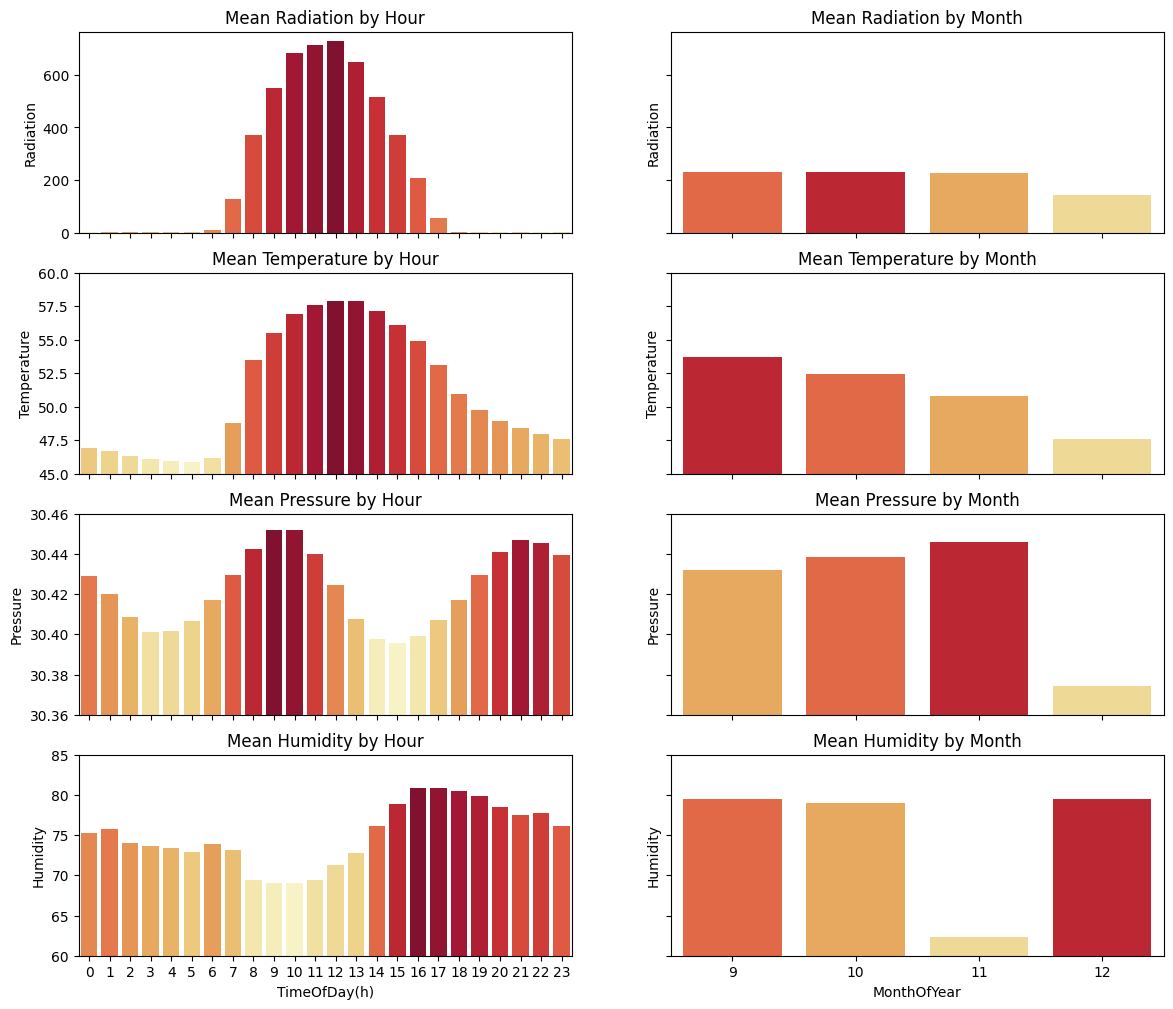

In [9]:
grouped_m=dataset_selection.groupby('MonthOfYear').mean().reset_index()
grouped_w=dataset_selection.groupby('WeekOfYear').mean().reset_index()
grouped_d=dataset_selection.groupby('DayOfYear').mean().reset_index()
grouped_h=dataset_selection.groupby('TimeOfDay(h)').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
ax3.set_ylim(45,60)
ax5.set_ylim(30.36,30.46)
ax7.set_ylim(60,85)

ax1.set_title('Mean Radiation by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Radiation'].argsort().argsort()
g = sns.barplot(x="TimeOfDay(h)", y='Radiation', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Mean Radiation by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Radiation'].argsort().argsort()
g = sns.barplot(x="MonthOfYear", y='Radiation', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Mean Temperature by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Temperature'].argsort().argsort()
g = sns.barplot(x="TimeOfDay(h)", y='Temperature', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean Temperature by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Temperature'].argsort().argsort()
g = sns.barplot(x="MonthOfYear", y='Temperature', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean Pressure by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort()
g = sns.barplot(x="TimeOfDay(h)", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean Pressure by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort()
g = sns.barplot(x="MonthOfYear", y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean Humidity by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Humidity'].argsort().argsort()
g = sns.barplot(x="TimeOfDay(h)", y='Humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Mean Humidity by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Humidity'].argsort().argsort()
g = sns.barplot(x="MonthOfYear", y='Humidity', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)

plt.show()

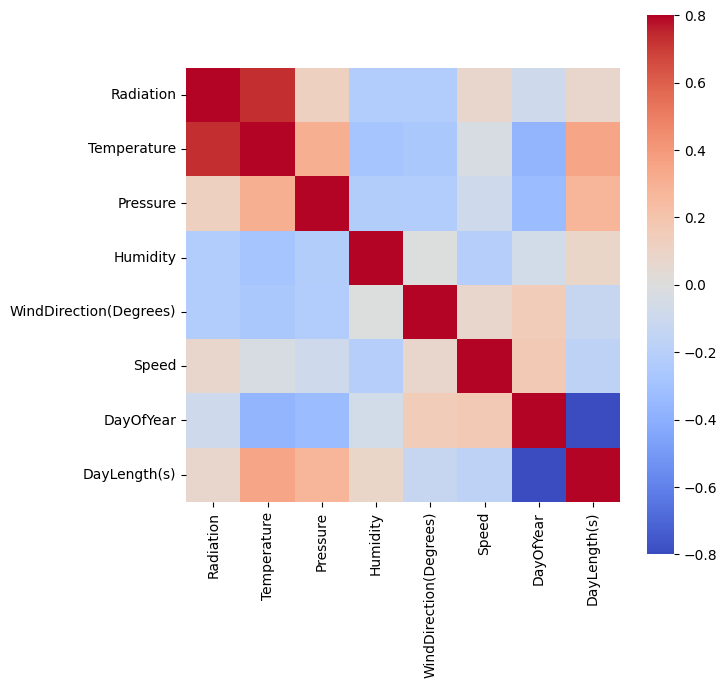

In [10]:
corrmat = dataset_selection.drop(['TimeOfDay(h)', 'TimeOfDay(m)', 'TimeOfDay(s)', 'UNIXTime', 'MonthOfYear', 'WeekOfYear'], inplace=False, axis=1)
corrmat = corrmat.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmin=-.8, vmax=.8, square=True, cmap = 'coolwarm')
plt.show()

In [12]:
df = dataset_master
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [13]:
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [14]:
print(df.index)

df = df.sort_values(['UNIXTime'], ascending = [True])
df.index =  pd.to_datetime(df['UNIXTime'], unit='s')

print(df.index)

df.head()

RangeIndex(start=0, stop=32686, step=1)
DatetimeIndex(['2016-09-01 10:00:08', '2016-09-01 10:05:10',
               '2016-09-01 10:20:06', '2016-09-01 10:25:05',
               '2016-09-01 10:30:09', '2016-09-01 10:45:04',
               '2016-09-01 10:50:06', '2016-09-01 10:55:04',
               '2016-09-01 11:00:07', '2016-09-01 11:05:05',
               ...
               '2017-01-01 09:10:02', '2017-01-01 09:15:02',
               '2017-01-01 09:20:04', '2017-01-01 09:25:01',
               '2017-01-01 09:30:02', '2017-01-01 09:35:02',
               '2017-01-01 09:40:01', '2017-01-01 09:45:04',
               '2017-01-01 09:50:03', '2017-01-01 09:55:01'],
              dtype='datetime64[ns]', name='UNIXTime', length=32686, freq=None)


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
UNIXTime,,,,,,,,,,,
2016-09-01 10:00:08,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
2016-09-01 10:05:10,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
2016-09-01 10:20:06,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
2016-09-01 10:25:05,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
2016-09-01 10:30:09,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


In [15]:
import pytz

HST = pytz.timezone('Pacific/Honolulu')
                                                                                ## unixtime is in utc
df.index = df.index.tz_localize(pytz.utc)                                       ## we can see that by comparing with "Time",
df.index = df.index.tz_convert(HST)                                             ## converting to hawaiian local time
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
UNIXTime,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
2016-09-01 00:05:10-10:00,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
2016-09-01 00:20:06-10:00,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
2016-09-01 00:25:05-10:00,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
2016-09-01 00:30:09-10:00,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


In [16]:
df['DayOfYear'] = df.index.strftime('%j').astype(int)
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DayOfYear
UNIXTime,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,245
2016-09-01 00:05:10-10:00,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,245
2016-09-01 00:20:06-10:00,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,245
2016-09-01 00:25:05-10:00,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00,245
2016-09-01 00:30:09-10:00,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00,245


In [17]:
df['TimeOfDay(s)'] = df.index.hour*60*60 + df.index.minute*60 + df.index.second
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DayOfYear,TimeOfDay(s)
UNIXTime,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,245,8
2016-09-01 00:05:10-10:00,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,245,310
2016-09-01 00:20:06-10:00,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,245,1206
2016-09-01 00:25:05-10:00,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00,245,1505
2016-09-01 00:30:09-10:00,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00,245,1809


In [18]:
df.drop(['TimeSunRise','TimeSunSet', 'Data', 'Time', 'WindDirection(Degrees)'], inplace=True, axis=1)

df.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,Speed,DayOfYear,TimeOfDay(s)
UNIXTime,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2.58,51,30.43,103,11.25,245,8
2016-09-01 00:05:10-10:00,1472724310,2.83,51,30.43,103,9.00,245,310
2016-09-01 00:20:06-10:00,1472725206,2.16,51,30.43,103,7.87,245,1206
2016-09-01 00:25:05-10:00,1472725505,2.21,51,30.43,103,18.00,245,1505
2016-09-01 00:30:09-10:00,1472725809,2.25,51,30.43,103,11.25,245,1809


In [19]:
print(df.shape)

(32686, 8)


In [20]:
dataset = df.values

X = dataset[:,2:8]
Y = dataset[:,1]
Y = Y.reshape(-1,1)


print(X.shape)
print(Y.shape)
print(type(X))

(32686, 6)
(32686, 1)
<class 'numpy.ndarray'>


In [21]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


scaler_X = preprocessing.StandardScaler().fit(X)
scaler_Y = preprocessing.StandardScaler().fit(Y)
X_scale = scaler_X.transform(X)
X_train, X_val_and_test, Y_train_unscaled, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val_unscaled, Y_test_unscaled = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
Y_train = scaler_Y.transform(Y_train_unscaled)
Y_val =  scaler_Y.transform(Y_val_unscaled)
Y_test =  scaler_Y.transform(Y_test_unscaled)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(26148, 6) (3269, 6) (3269, 6) (26148, 1) (3269, 1) (3269, 1)


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


## kernel_initializer='normal'


model = Sequential()
model.add(Dense(64, activation='relu',  kernel_initializer='normal', input_shape=(6,), kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

In [23]:
from keras.optimizers import Adam

#optimizer = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])
hist = model.fit(X_train, Y_train,
                batch_size=32, epochs=300,
                validation_data=(X_val, Y_val))

Epoch 1/300
818/818 [==============================] - 8s 6ms/step - loss: 0.6478 - mae: 0.2854 - val_loss: 0.2533 - val_mae: 0.2109
Epoch 2/300
818/818 [==============================] - 3s 4ms/step - loss: 0.2503 - mae: 0.2349 - val_loss: 0.2390 - val_mae: 0.2395
Epoch 3/300
818/818 [==============================] - 4s 5ms/step - loss: 0.2411 - mae: 0.2308 - val_loss: 0.2329 - val_mae: 0.2347
Epoch 4/300
818/818 [==============================] - 3s 4ms/step - loss: 0.2395 - mae: 0.2308 - val_loss: 0.2223 - val_mae: 0.1905
Epoch 5/300
818/818 [==============================] - 3s 3ms/step - loss: 0.2330 - mae: 0.2282 - val_loss: 0.2175 - val_mae: 0.1967
Epoch 6/300
818/818 [==============================] - 4s 5ms/step - loss: 0.2336 - mae: 0.2289 - val_loss: 0.2311 - val_mae: 0.2047
Epoch 7/300
818/818 [==============================] - 7s 9ms/step - loss: 0.2309 - mae: 0.2272 - val_loss: 0.2093 - val_mae: 0.1857
Epoch 8/300
818/818 [==============================] - 5s 6ms/step - 

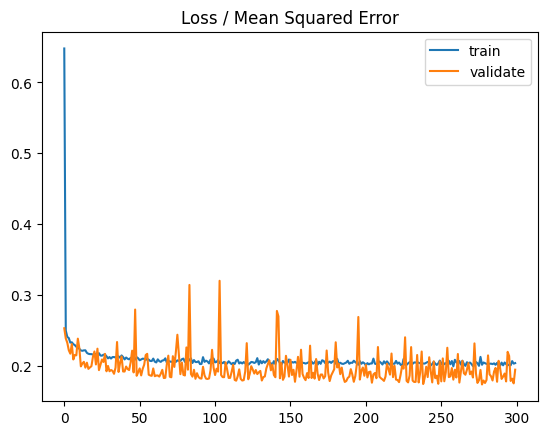

In [24]:
from matplotlib import pyplot

pyplot.title('Loss / Mean Squared Error')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

In [25]:
model.evaluate(X_test, Y_test)

103/103 [==============================] - 0s 2ms/step - loss: 0.1832 - mae: 0.1916


[0.18319760262966156, 0.19160373508930206]

In [26]:
Y_result_scaled= model.predict(X_test)
Y_result = scaler_Y.inverse_transform(Y_result_scaled)
print(Y_result)
print(Y_test_unscaled.reshape(Y_result.shape))

103/103 [==============================] - 0s 2ms/step
[[ -2.1622899]
 [ 23.230165 ]
 [ -2.1622899]
 ...
 [ -1.2189   ]
 [728.0981   ]
 [ -2.1622899]]
[[  1.23]
 [104.33]
 [  1.25]
 ...
 [ 61.13]
 [748.02]
 [  1.21]]


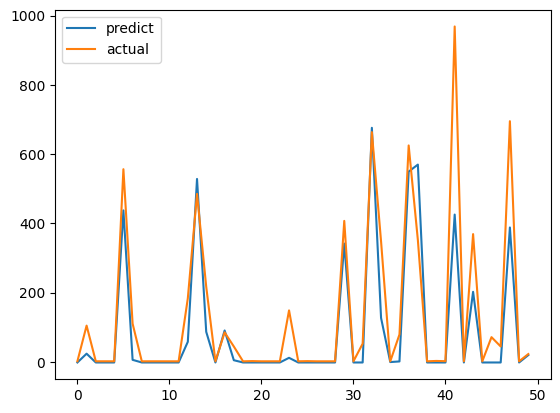

In [27]:
import numpy as np

axis_x = [i for i in range(50)]


pyplot.plot(axis_x, Y_result[:50], label='predict')
pyplot.plot(axis_x, Y_test_unscaled[:50], label='actual')
pyplot.legend()
pyplot.show()

In [28]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score


explained_variance_score = explained_variance_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
mean_squared_error = mean_squared_error(Y_test_unscaled.reshape(Y_result.shape), Y_result)
r_squared = r2_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.8687302103379646
mse = 13582.709968797348
r2 = 0.8619884867134331
